In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("merc.xlsx")

In [3]:
print(dataFrame.head())

   year  price transmission  mileage  tax   mpg  engineSize
0  2005   5200    Automatic    63000  325  32.1         1.8
1  2017  34948    Automatic    27000   20  61.4         2.1
2  2016  49948    Automatic     6200  555  28.0         5.5
3  2016  61948    Automatic    16000  325  30.4         4.0
4  2016  73948    Automatic     4000  325  30.1         4.0


In [4]:
print(dataFrame.describe())

               year          price        mileage           tax           mpg  \
count  13119.000000   13119.000000   13119.000000  13119.000000  13119.000000   
mean    2017.296288   24698.596920   21949.559037    129.972178     55.155843   
std        2.224709   11842.675542   21176.512267     65.260286     15.220082   
min     1970.000000     650.000000       1.000000      0.000000      1.100000   
25%     2016.000000   17450.000000    6097.500000    125.000000     45.600000   
50%     2018.000000   22480.000000   15189.000000    145.000000     56.500000   
75%     2019.000000   28980.000000   31779.500000    145.000000     64.200000   
max     2020.000000  159999.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  13119.000000  
mean       2.071530  
std        0.572426  
min        0.000000  
25%        1.800000  
50%        2.000000  
75%        2.100000  
max        6.200000  


In [6]:
print(dataFrame.isnull().sum())

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64


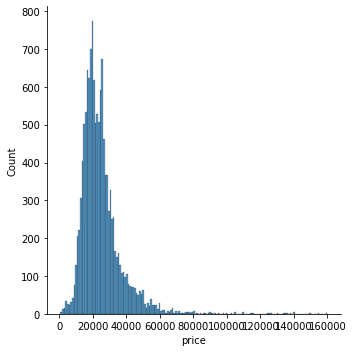

In [7]:
sbn.displot(dataFrame["price"])

In [8]:
#Daha doğru sonuç alabilmek adına veri setinin %10'luk kısmını fiyata göre kırptım
doksandokuzDataFrame = dataFrame.sort_values("price",ascending = False).iloc[131:]
doksandokuzDataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [13]:
# Klasik arabalardaki fiyat artışı sonucu negatif etkiliyor 
dataFrame=doksandokuzDataFrame
dataFrame = dataFrame[dataFrame.year != 1970]
dataFrame= dataFrame.drop("transmission",axis=1)

In [14]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values
x,y

(array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
        [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
        [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
        ...,
        [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
        [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
        [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]]),
 array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64))

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=50)
len(x_train),len(x_test)

(9090, 3897)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

model.fit(x = x_train, y = y_train, validation_data=(x_test, y_test), batch_size=250, epochs=300)

Epoch 1/300
37/37 [==============================] - 1s 7ms/step - loss: 680344704.0000 - val_loss: 668919936.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 680292160.0000 - val_loss: 668834624.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 680137536.0000 - val_loss: 668568384.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 679628608.0000 - val_loss: 667675328.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 678053952.0000 - val_loss: 665119424.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 673909760.0000 - val_loss: 658822656.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 664510080.0000 - val_loss: 645498304.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 645980544.0000 - val_loss: 620621376.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 6132266

<AxesSubplot:>

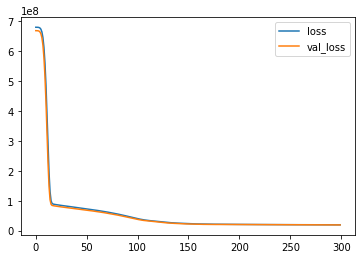

In [18]:
kayipVerisi = pd.DataFrame(model.history.history)
kayipVerisi.plot()

3130.376206732543


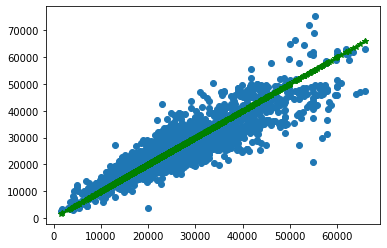

In [19]:
from sklearn.metrics import mean_absolute_error, mean_absolute_error
tahminDizisi = model.predict(x_test)
print(mean_absolute_error(y_test,tahminDizisi))
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")